
# Visualization Examples

* [Plotly Examples](https://plotly.com/python/box-plots/)
* [Matplotlib Examples](https://matplotlib.org/stable/gallery/lines_bars_and_markers/csd_demo.html#sphx-glr-gallery-lines-bars-and-markers-csd-demo-py)
* [Seaborn Examples](https://seaborn.pydata.org/examples/different_scatter_variables.html)

In [16]:
import plotly.express as px

df = px.data.tips()

fig = px.box(df, x="day", y="total_bill", color="smoker")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

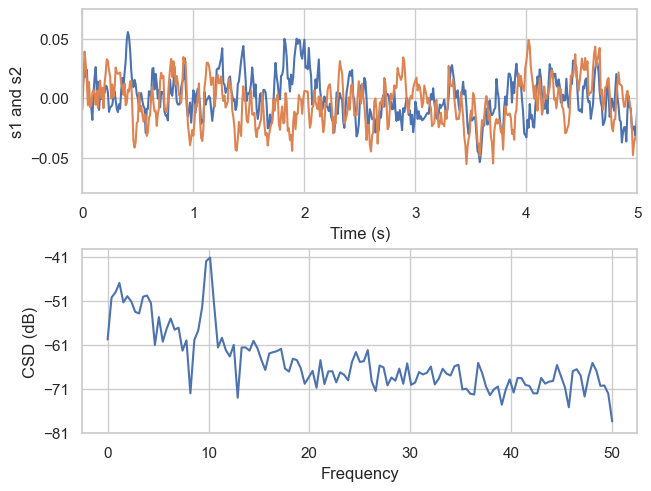

In [17]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(2, 1, layout='constrained')

dt = 0.01
t = np.arange(0, 30, dt)

# Fixing random state for reproducibility
np.random.seed(19680801)


nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2
r = np.exp(-t / 0.05)

cnse1 = np.convolve(nse1, r, mode='same') * dt   # colored noise 1
cnse2 = np.convolve(nse2, r, mode='same') * dt   # colored noise 2

# two signals with a coherent part and a random part
s1 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse1
s2 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse2

ax1.plot(t, s1, t, s2)
ax1.set_xlim(0, 5)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('s1 and s2')
ax1.grid(True)

cxy, f = ax2.csd(s1, s2, 256, 1. / dt)
ax2.set_ylabel('CSD (dB)')

plt.show()

<Axes: xlabel='carat', ylabel='price'>

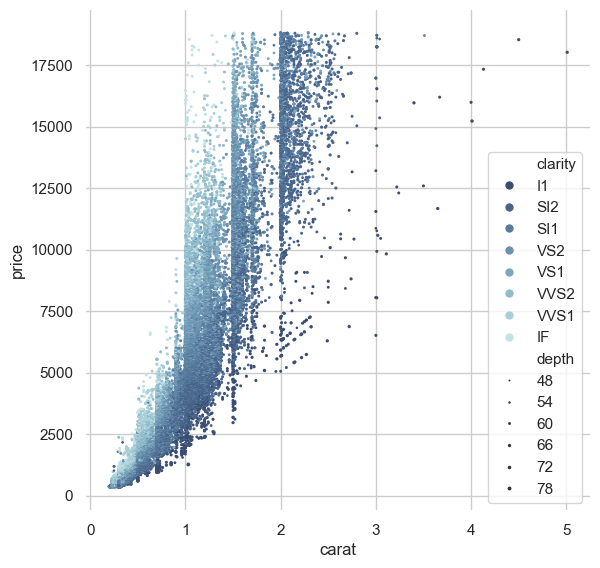

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Load the example diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)